In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('temp.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index(df['DATE'],inplace=True)
df.drop('DATE',axis = 1,inplace= True)
df.dropna(inplace = True)
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [3]:
df.shape

(1821, 5)

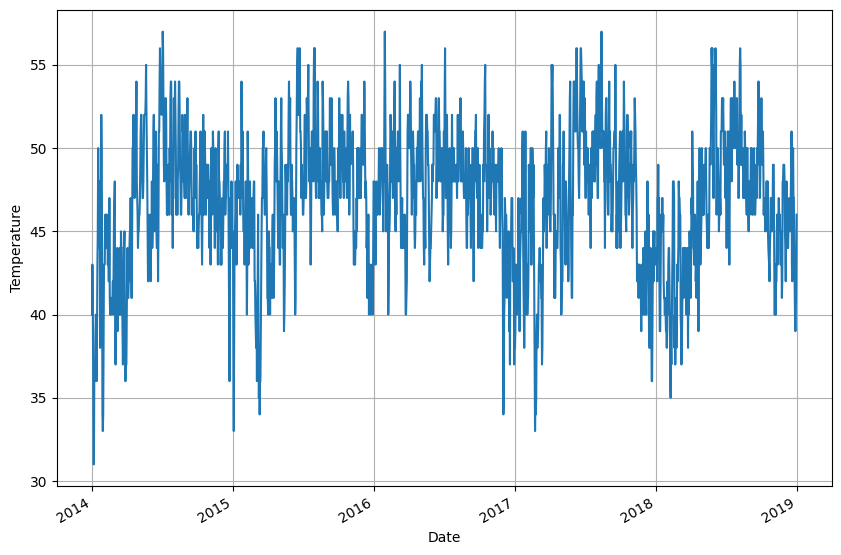

In [4]:
df['AvgTemp'].plot(figsize=(10,7))
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.grid()

In [5]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(df['AvgTemp'],autolag = 'AIC')
print('Test statistic =',results[0])
print('P-value =',results[1])
print("No of lags =",results[2])
print("""Critical Values :-
    1% = {},
    5% = {},
    10% = {}""".format(results[4]['1%'],results[4]['5%'],results[4]['10%']))

Test statistic = -6.554680125068785
P-value = 8.675937480199322e-09
No of lags = 12
Critical Values :-
    1% = -3.433972018026501,
    5% = -2.8631399192826676,
    10% = -2.5676217442756872


In [59]:
from pmdarima import auto_arima
trial = auto_arima(df['AvgTemp'],trace = True,suppress_warnings=True)
trial.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.610, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.221, Time=1.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.212, Time=1.55 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=1.46 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.657, Time=1.97 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.297, Time=2.00 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.488, Time=2.22 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8304.972, Time=2.14 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.311
Date:                Wed, 17 Jan 2024   AIC                           8294.623
Time:                        23:32:09   BIC                           8338.680
Sample:                             0   HQIC                          8310.876
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1474      0.345      3.326      0.001       0.471       1.824
ar.L1          0.9752      0.007    130.998      0.000       0.961       0.990
ma.L1         -0.1276      0.023     -5.461      0.000      -0.173      -0.082
ma.L2         -0.2238      0.024     -9.416      0.000      -0.270      -0.177
ma.L3         -0.2030      0.024     -8.597      0.000      -0.249      -0.157
ma.L4         -0.1395      0.023     -6.190      0.000      -0.184      -0.095
ma.L5         -0.0488      0.024     -2.020      0.043      -0.096      -0.001
sigma2         5.4499      0.169     32.237      0.000       5.119       5.781
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.89
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
train = df[:-30]
test = df[-30:]
print(train.shape,test.shape)

(1791, 5) (30, 5)


In [61]:
import statsmodels.api as sm 
model = sm.tsa.arima.ARIMA(train['AvgTemp'],order = (1,0,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Wed, 17 Jan 2024   AIC                           8156.395
Time:                        23:32:26   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start,end = end,type = 'levels')
pred.index = df.index[start:end+1]

In [63]:
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874127
2018-12-07    45.884370
2018-12-08    45.894467
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923892
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961185
2018-12-16    45.970176
2018-12-17    45.979037
2018-12-18    45.987770
2018-12-19    45.996378
2018-12-20    46.004861
2018-12-21    46.013223
2018-12-22    46.021464
2018-12-23    46.029586
2018-12-24    46.037592
2018-12-25    46.045482
2018-12-26    46.053259
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='DATE'>

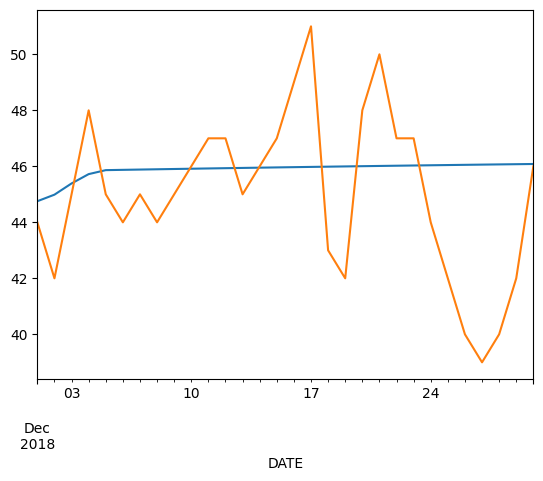

In [54]:
pred.plot()
test['AvgTemp'].plot()

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test))
print(test.mean(),rmse)

45.0 3.000463988750059
